<a href="https://colab.research.google.com/github/newfrogg/Automatic-Differentiation/blob/dev/autodiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Mục lớn                             | Mục nhỏ                                                         |           |
|-------------------------------------|-----------------------------------------------------------------|-----------|
| Introduction                        |                                                                 |  1 người  |
|                                     | Differential Calculus                                           |  Tử Quân  |
|                                     | Rules of Calculus                                               |  Tử Quân  |
|                                     | Multivariate Chain Rule                                         |  Tử Quân  |
|                                     | Geometry of Gradients and Gradient Descent                      |  Tử Quân  |
| What Autodiff Isn’t                 |                                                                 |  3 người  |
|                                     | Autodiff is not finite differences (numerical differentiation)  |  An Đông  |
|                                     | Autodiff is not symbolic differentiation                        |  An Đông  |
|                                     | What autodiff is ?                                              |  An Đông  |
|                                     | Types of Autodiff (explain forward, backward)                   |  An Đông  |
|                                     | Backpropagation Algorithm                                       |  Gia Hinh |
|                                     | Gradient-Based Optimization                                     |  Gia Hinh |
|                                     | give an example and describe the autodiff step-by-step workflow |  Gia Hinh |
|                                     | Summary. Compare betwwen each type advancement of each types    |  Gia Hinh |
| Visualization. Code, Implementation |                                                                 |  1 người  |
|                                     | Code                                                            | Bảo Lương |
| Exercise                            |                                                                 |  2 người  |
|                                     | Q1-4                                                            |   Triết   |
|                                     | Q5-8                                                            | Minh Quân |

# Introduction

## Differential Calculus
Differential calculus is fundamentally the study of how functions behave under small changes. The key of single variable calculus is the behavior of familiar functions can be modeled by a line in a small enough range. This means that for most functions, it is reasonable to expect that as we shift the $x$ value of the function by a small amount $x + \epsilon$, the output $f(x)$ will also be shifted by a little bit.

We can consider the ratio of the change in the output of a function for a small change in the input of the function. We can write this formally as:
\\[\frac{L(x+\epsilon) - L(x)}{(x+\epsilon) - x} = \frac{L(x+\epsilon) - L(x)}{\epsilon}.\\]

The derivative of a function quantifies how the function's output changes in response to changes in its input and is defined by the limit:
\\[\frac{df}{dx}(x) = \lim_{\epsilon \rightarrow 0}\frac{f(x+\epsilon) - f(x)}{\epsilon}.\\]

## Rules of Calculus
### Common Derivatives
When computing derivatives one can oftentimes use a series of rules to reduce the computation to a few core functions.

*   Derivative of constants. $\frac{d}{dx}c = 0$
*   Derivative of linear functions. $\frac{d}{dx}(ax) = a$
*   Power rule. $\frac{d}{dx}x^n = nx^{n-1}$
*   Derivative of exponentials. $\frac{d}{dx}e^x = e^x$
*   Derivative of the logarithm. $\frac{d}{dx}\log(x) = \frac{1}{x}$

### Derivative Rules
We can generalize the above derivatives and compute more complex derivatives by codify what happens when we take functions and combine them in various ways, most importantly: sums, products, and compositions.
*   Sum rule $\frac{d}{dx}\left(g(x) + h(x)\right) = \frac{dg}{dx}(x) + \frac{dh}{dx}(x)$
*   Product rule $\frac{d}{dx}\left(g(x)\cdot h(x)\right) = g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x)$
*   Chain rule $\frac{d}{dx}g(h(x)) = \frac{dg}{dh}(h(x))\cdot \frac{dh}{dx}(x)$

These rule provide us with a flexible set of tools to compute essentially any expression desired. As an example, let us find the derivative of the function $f(x) = \log\left(1+(x-1)^{10}\right)$:


\begin{split}\begin{aligned}
\frac{d}{dx}\left[\log\left(1+(x-1)^{10}\right)\right] & = \left(1+(x-1)^{10}\right)^{-1}\frac{d}{dx}\left[1+(x-1)^{10}\right]\\
& = \left(1+(x-1)^{10}\right)^{-1}\left(\frac{d}{dx}[1] + \frac{d}{dx}[(x-1)^{10}]\right) \\
& = \left(1+(x-1)^{10}\right)^{-1}\left(0 + 10(x-1)^9\frac{d}{dx}[x-1]\right) \\
& = 10\left(1+(x-1)^{10}\right)^{-1}(x-1)^9 \\
& = \frac{10(x-1)^9}{1+(x-1)^{10}}.
\end{aligned}\end{split}

Where each line has used the following rules:

1.   The chain rule and derivative of logarithm.
2.   The sum rule.
3.   The derivative of constants, chain rule, and power rule.
4.   The sum rule, derivative of linear functions, derivative of constants.

### Linear Approximation
When working with derivatives, it is often useful to geometrically interpret the approximation used above. In particular, note that the equation
 \\[f(x+\epsilon) \approx f(x) + \epsilon \frac{df}{dx}(x),\\]

approximates the value of $f$ by a line which passes through the point $(x, f(x))$ and has slope $\frac{df}{dx}(x)$. In this way we say that the derivative gives a linear approximation to the function $f$.

### Higher Order Derivatives
The derivative, $\frac{df}{dx}$, can be viewed as a function itself, so nothing stops us from computing the derivative of $\frac{df}{dx}$ to get $\frac{d^2f}{dx^2} = \frac{df}{dx}\left(\frac{df}{dx}\right)$. We will call this the second derivative of $f$. This function is the rate of change of the rate of change of $f$, or in other words, how the rate of change is changing. We may apply the derivative any number of times to obtain what is called the $n$-th derivative. To keep the notation clean, we will denote the $n$-th derivative as

\\[f^{(n)}(x) = \frac{d^{n}f}{dx^{n}} = \left(\frac{d}{dx}\right)^{n} f.\\]

The second derivative can be interpreted as describing the way that the function $f$ curves. A positive second derivative leads to a upwards curve, while a negative second derivative means that $f$ curves downwards, and a zero second derivative means that $f$ does not curve at all.
### Taylor Series
The Taylor series provides a method to approximate the function $f(x)$ if we are given values for the first $n$ derivatives at a point $x_0$, i.e., $\left\{ f(x_0), f^{(1)}(x_0), f^{(2)}(x_0), \ldots, f^{(n)}(x_0) \right\}$. The idea will be to find a degree $n$ polynomial that matches all the given derivatives at $x_0$.

We can get a degree $n$ polynomial by
\\[P_n(x) = \sum_{i = 0}^{n} \frac{f^{(i)}(x_0)}{i!}(x-x_0)^{i}.\\]
where the notation
\\[f^{(n)}(x) = \frac{d^{n}f}{dx^{n}} = \left(\frac{d}{dx}\right)^{n} f.\\]

Taylor series have two primary applications:

1. Theoretical applications: Often when we try to understand a too complex function, using Taylor series enables us to turn it into a polynomial that we can work with directly.

2. Numerical applications: Some functions like $e^{x}$ or $\cos(x)$ are difficult for machines to compute. They can store tables of values at a fixed precision (and this is often done), but it still leaves open questions like “What is the 1000-th digit of $\cos(1)$?” Taylor series are often helpful to answer such questions.

## Geometry of Gradients and Gradient Descent


In multivariable calculus, the gradient of a scalar-valued function $f: \mathbb{R}^n \rightarrow \mathbb{R} $ is a vector that points in the direction of the greatest rate of increase of the function. The gradient is denoted as $\nabla f $ and is defined as:

\\[\nabla f(\mathbf{x}) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right)\\]

Here, each component $\frac{\partial f}{\partial x_i}$ represents the partial derivative of $f$ with respect to the variable $x_i$.

The geometric interpretation of gradients can be explained as follows:

* Direction: The gradient vector at a point $\mathbf{x}$ points in the direction of the steepest ascent of the function $f$ at that point.

* Magnitude: The length (or norm) of the gradient vector indicates the rate of increase of the function in that direction.

* Orthogonality to Level Sets: The gradient at a point is perpendicular (orthogonal) to the level set (or contour line) passing through that point. A level set is the set of points where the function $f$ has a constant value.

Gradient descent is an iterative optimization algorithm used to find local minima of differentiable functions. Starting from an initial point $\mathbf{x}_0$, the algorithm updates the point iteratively using the rule:

\\[\mathbf{x}_{k+1} = \mathbf{x}_k - \eta \nabla f(\mathbf{x}_k)\\]

Here:

* $\mathbf{x}_k $: Current point in $\mathbb{R}^n$.

* $\eta$: Learning rate or step size, a positive scalar determining the size of the step taken in the direction opposite to the gradient.

* $\nabla f(\mathbf{x}_k)$: Gradient of the function $ f$ at point $\mathbf{x}_k$.

At each iteration, the algorithm moves the current point $\mathbf{x}_k$ in the direction opposite to the gradient $\nabla f(\mathbf{x}_k)$, aiming to decrease the function's value.

Imagine a three-dimensional surface representing the function $f(\mathbf{x}) $, where the height corresponds to the function's value. The gradient at any point on this surface points in the direction of the steepest ascent. Therefore, moving in the opposite direction of the gradient leads to the steepest descent.

In two dimensions, the level sets of $ f $ are contour lines. The gradient vector at any point is perpendicular to the contour line at that point, pointing towards higher values of $f$. Gradient descent moves the point perpendicularly across contour lines towards regions of lower function values.

## Multivariate Chain Rule

The Multivariate Chain Rule is a fundamental concept in calculus, where functions often depend on multiple variables through complex compositions. When a function depends on multiple variables, and each of those variables is itself a function of other variables, the multivariate chain rule provides a systematic way to compute derivatives. This is essential for understanding how changes in input variables affect the output.

If a function $f$ depends on intermediate variables $u$ and $v$, which in turn depend on variables $a$ and $b$, the derivative of $f$ with respect to $a$ is given by:

\\[\frac{\partial f}{\partial a} = \frac{\partial f}{\partial u} \frac{\partial u}{\partial a} + \frac{\partial f}{\partial v} \frac{\partial v}{\partial a}\\]

This formula accounts for all the paths through which $a$ influences $f$.

For example, let us imagine network of functions where the functions on the right depend on those that are connected to on the left:

<p align="center">
  <img src="https://d2l.ai/_images/chain-net2.svg" width="400" height="300"/>
</p>

To compute something like $\frac{\partial f}{\partial y}$, we need to sum over all (in this case $3$) paths from $y$ to $f$ giving

\\[\frac{\partial f}{\partial y} = \frac{\partial f}{\partial a} \frac{\partial a}{\partial u} \frac{\partial u}{\partial y} + \frac{\partial f}{\partial u} \frac{\partial u}{\partial y} + \frac{\partial f}{\partial b} \frac{\partial b}{\partial v} \frac{\partial v}{\partial y}.\\]



<div align="justify">

# What AD Is Not ?
Without a clear introduction, many people place automatic differentiation (AD) in the same category as numerical differentiation or symbolic differentiation. This confusion is understandable because AD delivers numerical values for derivatives while using the rules of symbolic calculus, yet it only stores the resulting numbers rather than the complete algebraic expressions. This dual character means AD operates in a space that overlaps both approaches (Griewank, 2003). To start, we will explain how AD differs from those two familiar methods and in many respects exceeds their capabilities.

## AD Is Not Numerical Differentiation
Numerical differentiation estimates a derivative by applying finite difference formulas to function values sampled at specific points (Burden & Faires, 2001). At its core, the method springs directly from the limit definition of the derivative. For example, for a multivariate function $f∶R^n→R$, one can approximate the gradient $(\frac{∂f}{∂x_1 },…,\frac{∂f}{∂x_n})$ using:

$$\frac{∂f(x)}{∂x_i} \approx \frac{f(x+he_i )-f(x)}{h}\text{ (Eq.1)}$$


where $e_i$ is the $i$-th unit vector and $h>0$ is a small step size. Its main upside is simplicity of implementation; the downsides are that computing a gradient in $n$ dimensions needs $O(n)$ separate evaluations of $f$ and that you must choose the step size $h$ with great care.

Approximating derivatives numerically is fundamentally unstable and suffers from poor conditioning, except when using complex variable techniques that apply only to certain holomorphic functions (Fornberg, 1981). This instability arises from truncation errors and round off errors introduced by finite computational precision and the selection of the step size $h$. While the truncation error vanishes as $h$ approaches zero $(h→0)$, reducing $h$ increases the round off error until it becomes the primary source of inaccuracy.

Various methods have been proposed to reduce the approximation error in numerical differentiation. For example, using a central difference formula:

$$ \frac{∂f(x)}{∂x_i} \approx \frac{f(x+he_i )-f(x-he_i)}{2h} + O(h^2 )\text{ (Eq.2)}$$

in which the leading order errors cancel out, pushing the truncation error from first order to second order in $h$. In one dimension, this central difference (Eq. 2) is just as expensive as the forward difference (Eq. 1) because both require two evaluations of $f$. But in higher dimensions the cost grows quickly: forming the full Jacobian of a map $f∶R^n→R^m$ using central differences demands $2mn$ function evaluations, forcing a trade off between accuracy and computational expense.

Advanced approaches to enhance numerical differentiation, such as higher order finite difference schemes, Richardson extrapolation toward the limit (Brezinski & Zaglia, 1991), and weighted sum differential quadrature methods (Bert & Malik, 1996), all raise computational cost, never fully remove approximation errors, and remain highly vulnerable to floating point truncation. Moreover, the $O(n)$ expense of computing an $n$-dimensional gradient makes numerical differentiation impractical for machine learning, where $n$ can reach millions or billions in cutting edge deep networks (Shazeer et al., 2017). By contrast, deep learning models tolerate approximation errors reasonably well thanks to their intrinsic resilience to numerical noise (Gupta et al., 2015).

## AD Is Not Symbolic Differentiation

Symbolic differentiation refers to the automated transformation of mathematical expressions to derive their exact derivative formulas (Grabmeier and Kaltofen, 2003). This is achieved by systematically applying differentiation rules, for example:

$$ \frac{d}{dx}(f(x)+g(x)) \approx \frac{d}{dx}(f(x)) + \frac{d}{dx}(g(x))\text{ (Eq.3)}$$

$$ \frac{d}{dx}(f(x)g(x)) \approx (\frac{d}{dx}(f(x)))g(x) + f(x)(\frac{d}{dx}(g(x)))\text{ (Eq.4)}$$

When mathematical formulas are stored as structured data, differentiating an expression tree by symbolic means becomes a fully mechanical task, an idea that dates back to the earliest days of calculus (Leibniz, 1685). Today, this approach is implemented in computer algebra systems like Mathematica, Maxima, and Maple, as well as in machine learning libraries such as Theano.

In optimization, symbolic derivatives can reveal the underlying structure of a problem and sometimes even yield closed-form solutions for extrema( such as solving for $\frac{d}{dx} f(x)=0$) bypassing the need for further derivative evaluations. However, symbolic derivatives often expand into expressions that grow exponentially in size compared to the original formula, making them impractical for efficient runtime computation of derivative values.

Take the function $h(x)=f(x)h(x)$ and apply the product rule. Both $h(x)$ and its derivative $(\frac{d}{dx} h(x))$ share the subexpressions $f(x)$ and $g(x)$. On the derivative’s right hand side, the terms $f(x)$ and $\frac{d}{dx} f(x)$ appear separately. If you immediately expand $\frac{d}{dx} f(x)$ by plugging in its symbolic derivative, you duplicate every computation common to $f(x)$ and $\frac{d}{dx} f(x)$. Repeating this process without optimization causes the symbolic representation to grow exponentially, making evaluation extremely slow. This issue is called expression swell.

![image](./image/expression_swell.png "Computation Graph")
<p style="text-align:center;">Figure 1: Expression Swell</p>

When our focus is on obtaining accurate numerical derivatives rather than preserving their symbolic representations, we can greatly reduce computational effort by storing only the numerical values of intermediate sub expressions. To make this even more efficient, we interleave differentiation and simplification at each step. This concept is the foundation of automatic differentiation: at every elementary operation, perform the symbolic differentiation while simultaneously tracking and storing the numerical results alongside the primary function’s computation. This procedure defines forward mode AD, which we will discuss in the next section.

# What is Autodiff and type of Autodiff ?
## What is Autodiff ?

Automatic differentiation can be viewed as an alternative way to execute a program in which the original calculations are extended to include derivative computations. Every numerical routine ultimately breaks down into a finite collection of basic operations whose derivatives are known (Verma, 2000; Griewank and Walther, 2008). By applying the chain rule to combine the derivatives of these basic operations, one obtains the derivative of the entire composite function. Common basic operations include addition, subtraction, multiplication, division, the sign operation, and transcendental functions such as exponentials, logarithms, and trigonometric functions.

To implement this, we can leverage an evaluation trace. An evaluation trace is a special table that keeps track of intermediate variables as well as the operations that created them. Every row corresponds to an intermediate variable and the elementary operation that caused it. These variables, called primals, are typically denoted $v_i$ for functions $f:R^n→R^m$ and follow these rules:

- Input variables: $v_{i-n}=x_i,i=1,…,n$
- Intermediate variables: $v_i,i=1,…,l$
- Output variables: $y_{m-i}=v_{l-i}  ,i=m-1,…,0$



Example:

$$y=f(x_1,x_2 )=x_1 x_2+x_2-ln⁡(x_1 )\text{ (Eq.5)}$$
$$x_1=2,x_2=4$$

<div align="center">

| **Forward Primal Trace** | **Output** |
| -------- | ------- |
| $v_{-1}=x_1$ | 2 |
| $v_{0}=x_2$ | 4 |
| $v_1=v_{-1} \times v_0$ | 2 x (4) = 8 |
| $v_2=ln⁡(v_{-1})$ | ln(2) = 0.693 |
| $v_3=v_1+v_0$ | 8 + 4 = 12 |
| $v_4=v_3-v_2$ | 12 – 0.693 = 11.307 |
| $y=v_4$ | 11.307 |

<p style="text-align:center;">Table 1: Forward Primal Trace</p>
</div>

![image](./image/compution_graph.png "Computation Graph")
<p style="text-align:center;">Figure 2: Computation Graph</p>

Evaluation traces are fundamental to automatic differentiation. Unlike symbolic differentiation, which is restricted to closed form expressions, AD can also handle algorithms that include branching, loops, recursion, and function calls. This flexibility stems from the fact that any numerical program execution generates a trace of concrete input, intermediate, and output values. Those values alone suffice to calculate derivatives via repeated application of the chain rule, regardless of which control flow path the code followed. In other words, AD disregards any operations, such as conditionals or loop controls, that do not directly affect numerical values.

## Forward Mode

Forward mode AD enhances the evaluation trace by linking each primary value $v_i$ to a tangent $\dot{v_i}$. These tangents record the partial derivative of each value relative to the selected input variable.

Referencing back to eq. 5, we'd have the following definition of tangents if we were interested in finding $\frac{∂y}{∂x_2 }$:

$$ \dot{v_i} = \frac{∂v_i}{∂x_2} $$

Continuing from this definition, we can build out the forward primal and forward tangent trace to compute $\frac{∂y}{∂x_2}$ when $x_1=3,x_2=-4,\dot{x_1}=\frac{∂x_1}{∂x_2}=0$, and $\dot{x_2}=\frac{∂x_2}{∂x_2}=1$.

<div align="center">

| Forward Primal Trace | Output | Forward Tangent Trace                       | Output           |
|----------------------|--------|---------------------------------------------|------------------|
| $v_{-1} = x_1$       | 3      | $\dot v_{-1} = \dot x_1$                    | 0                |
| $v_{0} = x_2$        | –4     | $\dot v_{0} = \dot x_2$                     | 1                |
| $v_{1} = v_{-1} \times v_{0}$ | 3 $\times$ (-4) = -12 | $\dot v_{1} = \dot v_{-1}\,v_{0} + \dot v_{0}\,v_{-1}$ | 0$\times$(-4)+1$\times$(3)=3 |
| $v_{2} = \ln(v_{-1})$| ln(3)=1.10 | $\dot v_{2} = \dot v_{-1}\times\frac{1}{v_{-1}}$ | $0\times\frac1{3}=0$ |
| $v_{3} = v_{1} + v_{0}$ | -12 + -4 = -16 | $\dot v_{3} = \dot v_{1} + \dot v_{0}$ | $3 + 1 = 4$ |
| $v_{4} = v_{3} - v_{2}$ | -16 - 1.10 = -17.10 | $\dot v_{4} = \dot v_{3} - \dot v_{2}$ | $4 - 0 = 4$ |
| $y = v_{4}$ | -17.10 | $\dot y = \dot v_{4}$ | $4$ |

<p style="text-align:center;">Table 2: Forward Mode Trace</p>
</div>


Forward mode AD works by, at each elementary operation, calculating both the usual intermediate values (primals) and their derivatives (tangents) simultaneously using standard calculus rules. This mechanism not only yields derivatives but can build entire Jacobian matrices. For a function $f:R^n→R^m$, we set the input **x=a** and initialize its tangent $\dot{x}$ to the unit vector $e_i$ for $i=1,…,n$. Running the function in forward mode then produces the partial derivatives of every output $y_j$ with respect to that single input $x_i$. Each forward pass therefore generates one column of the Jacobian, giving all $\frac{∂y_j}{∂x_i }$.

Jacobian Matrix:

$$
J =
\begin{pmatrix}
\displaystyle \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \displaystyle \frac{\partial y_{1}}{\partial x_{n}} \\
\vdots & \ddots & \vdots \\
\displaystyle \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \displaystyle \frac{\partial y_{m}}{\partial x_{n}}
\end{pmatrix}
$$

Since $f∶R^n→R^m$ has $n$ inputs and each forward mode pass produces one column of the Jacobian, assembling the full $m×n$ Jacobian requires $O(n)$ evaluations. Remember that the Jacobian collects every partial derivative of each output with respect to every input—the very gradients used in optimization.

Forward mode AD naturally extends to compute the Jacobian–vector product (JVP). Given J ϵ $R^{m×n}$ and a direction **r** ϵ $R^n$, the JVP **J∙r** is an $m$-dimensional vector describing how the outputs shift when the inputs are perturbed along **r**.

The power of forward mode AD lies in the fact that you never have to form the entire Jacobian. By selecting an input point and a single perturbation vector **r** , one forward mode evaluation directly yields the JVP **J∙r** with no need to compute all Jacobian columns.


Jacobian-vector Product:

$$
J\,\cdot\mathbf{r}
=
\begin{pmatrix}
\displaystyle \frac{\partial y_1}{\partial x_1} & \cdots & \displaystyle \frac{\partial y_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\displaystyle \frac{\partial y_m}{\partial x_1} & \cdots & \displaystyle \frac{\partial y_m}{\partial x_n}
\end{pmatrix}
\;\cdot\;
\begin{pmatrix}
r_1\\
\vdots\\
r_n
\end{pmatrix}
$$

In summary, forward mode AD is especially efficient for functions $f∶R^n→R^m$ when the number of inputs $n$ is much smaller than the number of outputs $m$. In that scenario, one forward pass suffices to compute the entire Jacobian. Conversely, for a function from $R^n$ to $R$, you need $n$ forward passes to obtain its gradient—making forward mode less practical when $n$ is large.

This distinction matters in neural networks, where the model’s parameters live in $R^n$ but the loss is a single scalar in $R$. Using forward mode AD for gradient based training would be inefficient because $n$ is typically enormous.

Although forward mode avoids numerical pitfalls like instability and expression swell (unlike finite differences or symbolic differentiation), it does not scale well to high dimensional inputs. That limitation is exactly why we turn to AD’s other variant, reverse mode AD for deep learning.


## Reverse Mode

At this stage, we introduce reverse mode AD, which mirrors forward mode in spirit but differs in technique. We start by defining adjoints $\bar{v_i}$, each of which represents the partial derivative of a specific output $y_j$, with respect to an intermediate variable $v_i$. Formally, for a function $f∶R^n→R^m$ and indices $i=1,…,n$ and $j=1,…,m$, we set up these adjoints as follows:

$$ \bar{v_i} =  \frac{∂y_j}{∂v_j}$$

In reverse mode AD, we first execute a forward pass exactly as in ordinary code, computing all intermediate values. Unlike forward mode, we don’t calculate derivatives (adjoints) on the fly—instead, we record every operation and its inputs in a computational graph. Once the forward pass is complete, we traverse that graph backward. Using cached intermediate values and the known derivatives of each elementary operation, we apply the chain rule in reverse order to compute each adjoint $\bar{v_i}$. This backward sweep—from final outputs back to inputs—is what gives reverse mode its name.

With intuition behind reverse mode AD, let's take a look at the reverse mode evaluation trace of eq.5 using the same values for the input variables from the Forward Mode Trace.


<div align="center">

| Forward Primal Trace      | Output               | Reverse Adjoint Trace                                                                       | Output                 |
|---------------------------|----------------------|---------------------------------------------------------------------------------------------|------------------------|
| $v_{-1} = x_1$            | 3                  | $\bar v_{-1} = \bar x_1 = \bar v_2 \times \bigl(\tfrac{1}{v_{-1}}\bigr) + \bar v_1 \times v_0$ | -1$\times\tfrac{1}{3}$ + 1$\times$(-4) = -4.33 |
| $v_{0} = x_2$             | -4                 | $\bar v_{0} = \bar x_2 = \bar v_3 \times 1 + \bar v_1 \times v_{-1}$                         | $1\times1 + 1\times3 = 4$           |
| $v_{1} = v_{-1}\times v_{0}$ | 3 $\times$ (-4) = -12 | $\bar v_{1} = \bar v_3 \times 1$                                                            | $1\times1 = 1$        |
| $v_{2} = \ln(v_{-1})$     | ln(3) = 1.10      | $\bar v_{2} = \bar v_4 \times (-1)$                                                         | $1\times(-1) = -1$    |
| $v_{3} = v_{1} + v_{0}$   | -12 + (-4) = -16   | $\bar v_{3} = \bar v_4 \times 1$                                                            | $1\times1 = 1$        |
| $v_{4} = v_{3} - v_{2}$   | -16 - 1.10 = -17.10| $\bar v_{4} = \bar y$                                                                       | 1                    |
| $y = v_{4}$               | -17.10             | $\bar y$                                                                                    | 1                    |

<p style="text-align:center;">Table 3: Reverse Mode Trace</p>
</div>


We begin the backward pass in reverse mode AD by seeding the output’s adjoint $\bar{y}=\frac{∂y}{∂y}=1$. From there, we propagate derivatives back to every variable that influenced $y$, using each operation’s local derivative. Eventually, every input $x$ that contributed to $y$ acquires its adjoint $\bar{x}$.

You may wonder why intermediates like $\bar{v}_{-1}$ and $\bar{v}_{0}$ each receive two contributions when their primal values feed into multiple downstream operations (for example, both $v_2$ and $v_1$ depend on them). Rather than discarding one path, we sum both partial derivatives—so each variable’s adjoint accumulates its total effect on the final output.

Just as forward mode can compute Jacobians by generating one column per pass, reverse mode can generate rows of the Jacobian. If $f∶R^n→R^m$, you set **x=a** and run one reverse mode pass with $\bar{y}=e_j$ for each output index $j$($j=1,…,m$). That pass produces $\frac{∂y_j}{∂x_i }$ for $i=1,…,n$, i.e. one complete row of **J**. Repeating this for all m outputs costs $O(m)$ evaluations.

Moreover, reverse mode naturally yields the vector–Jacobian product (VJP). Given a cotangent (row) vector $r^T$  ϵ $R^{1×m}$, a single backward pass computes $r^T$∙**J**( **J** ϵ $R^{m×n}$), an $1×n$ vector of weighted partials—describing how a perturbation in the outputs propagates back to the inputs.

Vector-Jacobian Product:

$$
\mathbf{r}^T \cdot J
=
\begin{matrix}
(r_1 & \cdots & r_m)^T
\end{matrix}
\cdot
\begin{pmatrix}
\displaystyle \frac{\partial y_1}{\partial x_1} & \cdots & \displaystyle \frac{\partial y_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\displaystyle \frac{\partial y_m}{\partial x_1} & \cdots & \displaystyle \frac{\partial y_m}{\partial x_n}
\end{pmatrix}
$$

Vector-Jacobian Product (Alt. Form):

$$
J^T \,.\mathbf{r}
=
\begin{pmatrix}
\displaystyle \frac{\partial y_1}{\partial x_1} & \cdots & \displaystyle \frac{\partial y_m}{\partial x_1} \\
\vdots & \ddots & \vdots \\
\displaystyle \frac{\partial y_1}{\partial x_n} & \cdots & \displaystyle \frac{\partial y_m}{\partial x_n}
\end{pmatrix}^T
\cdot
\begin{pmatrix}
r_1 & \cdots & r_m
\end{pmatrix}
$$

Vector–Jacobian products (VJPs) are central to neural network optimization. We view the Jacobian **J** as the matrix of partial derivatives of a model’s outputs with respect to its inputs, and we interpret $r^T$ as the gradient of a loss function with respect to those outputs. Computing $r^T$∙**J** in this setting directly yields the gradients of the loss with respect to every input parameter—exactly what we need for training—without ever forming the full Jacobian.

In reverse mode AD, one backward pass produces the gradient of a single output with respect to all inputs. To obtain gradients for $m$ outputs, you would run $m$ such passes. Since neural networks typically have $n≫m$ parameters but only one scalar loss, reverse mode is ideal: a single reverse pass computes all $n$ gradients in one shot. Although it uses more memory to store intermediate values, that cost is a small price to pay for avoiding an $O(n)$ explosion in computation time. Ultimately, reverse mode AD is the most efficient choice for gradient based learning, delivering all required derivatives in just one backward sweep.



</div>

# Backpropagation Algorithm
Backpropagation Algorithm is the central in traning neural networks.
* It is an algorithm for computing gradients
* It is a special case of **reverse-mode automatic differentiation** (AD) applied to a computational graph with <font color='red'>a scalar-output</font>.
* Note: Backpropagation refers to the <font color='red'> whole process of training an artificial neural network </font> using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. **In contrast, reverse-mode auto diff is simply a technique used to compute gradients efficiently and it happens to be used by backpropagation.**

Let take an example. We have a function, where:

\begin{split}\begin{aligned}
f(u, v) & = (u+v)^{2} \\
u(a, b) & = (a+b)^{2}, \qquad v(a, b) = (a-b)^{2}, \\
a(w, x, y, z) & = (w+x+y+z)^{2}, \qquad b(w, x, y, z) = (w+x-y-z)^2.
\end{aligned}\end{split}

For illustration, this diagram describes the nodes represent variables and edges show functional dependence.
<p align="center">
  <img src="https://d2l.ai/_images/chain-net1.svg" width="400" height="300"/>
</p>



If we want to calculate $\frac{\partial f}{\partial w}$, applying the multi-variate chain rule to get that:
\begin{split}\begin{aligned}
\frac{\partial f}{\partial w} & = \frac{\partial f}{\partial u}\frac{\partial u}{\partial w} + \frac{\partial f}{\partial v}\frac{\partial v}{\partial w}, \\
\frac{\partial u}{\partial w} & = \frac{\partial u}{\partial a}\frac{\partial a}{\partial w}+\frac{\partial u}{\partial b}\frac{\partial b}{\partial w}, \\
\frac{\partial v}{\partial w} & = \frac{\partial v}{\partial a}\frac{\partial a}{\partial w}+\frac{\partial v}{\partial b}\frac{\partial b}{\partial w}.
\end{aligned}\end{split}

Next, try using this decomposition to compute $\frac{\partial f}{\partial w}$. Notice that all we need here are the various single step partials:
\begin{split}\begin{aligned}
\frac{\partial f}{\partial u} = 2(u+v), & \quad\frac{\partial f}{\partial v} = 2(u+v), \\
\frac{\partial u}{\partial a} = 2(a+b), & \quad\frac{\partial u}{\partial b} = 2(a+b), \\
\frac{\partial v}{\partial a} = 2(a-b), & \quad\frac{\partial v}{\partial b} = -2(a-b), \\
\frac{\partial a}{\partial w} = 2(w+x+y+z), & \quad\frac{\partial b}{\partial w} = 2(w+x-y-z).
\end{aligned}\end{split}

If we write this out into code this becomes a fairly manageable expression.




In [ ]:
# !pip install torch==2.0.0 torchvision==0.15.1
# !pip install d2l==1.0.3
## Import necessary libraries
%matplotlib inline
import numpy as np
import torch
from IPython import display
from mpl_toolkits import mplot3d
# from d2l import torch as d2l
# Compute the value of the function from inputs to outputs
w, x, y, z = -1, 0, -2, 1
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2
print(f'    f at {w}, {x}, {y}, {z} is {f}')

# Compute the single step partials
df_du, df_dv = 2*(u + v), 2*(u + v)
du_da, du_db, dv_da, dv_db = 2*(a + b), 2*(a + b), 2*(a - b), -2*(a - b)
da_dw, db_dw = 2*(w + x + y + z), 2*(w + x - y - z)

# Compute the final result from inputs to outputs
du_dw, dv_dw = du_da*da_dw + du_db*db_dw, dv_da*da_dw + dv_db*db_dw
df_dw = df_du*du_dw + df_dv*dv_dw
print(f'df/dw at {w}, {x}, {y}, {z} is {df_dw}')

    f at -1, 0, -2, 1 is 1024
df/dw at -1, 0, -2, 1 is -4096


However, note that this still does not make it easy to compute something like
$\frac{\partial f}{\partial x}$

The reason for that is the way we chose to apply the chain rule. If we look at what we did above, we always kept $\partial w$ in the denominator when we would. In this way, we chose to apply the chain rule seeing how changed every other variable. If that is what we wanted, this would be a good idea.

However, think back to our motivation from deep learning: we want to see how very parameter changes the loss. In essence, we want to apply the chain rule keeping $\partial f$ in the numerator whenever we can!

To be more explicit, note that we can write

\begin{split}\begin{aligned}
\frac{\partial f}{\partial w} & = \frac{\partial f}{\partial a}\frac{\partial a}{\partial w} + \frac{\partial f}{\partial b}\frac{\partial b}{\partial w}, \\
\frac{\partial f}{\partial a} & = \frac{\partial f}{\partial u}\frac{\partial u}{\partial a}+\frac{\partial f}{\partial v}\frac{\partial v}{\partial a}, \\
\frac{\partial f}{\partial b} & = \frac{\partial f}{\partial u}\frac{\partial u}{\partial b}+\frac{\partial f}{\partial v}\frac{\partial v}{\partial b}.
\end{aligned}\end{split}

Note that this application of the chain rule has us explicitly compute $\frac{\partial f}{\partial u}, \frac{\partial f}{\partial v}, \frac{\partial f}{\partial a}, \frac{\partial f}{\partial b}, \; \textrm{and} \; \frac{\partial f}{\partial w}$

\begin{split}\begin{aligned}
\frac{\partial f}{\partial x} & = \frac{\partial f}{\partial a}\frac{\partial a}{\partial x} + \frac{\partial f}{\partial b}\frac{\partial b}{\partial x}, \\
\frac{\partial f}{\partial y} & = \frac{\partial f}{\partial a}\frac{\partial a}{\partial y}+\frac{\partial f}{\partial b}\frac{\partial b}{\partial y}, \\
\frac{\partial f}{\partial z} & = \frac{\partial f}{\partial a}\frac{\partial a}{\partial z}+\frac{\partial f}{\partial b}\frac{\partial b}{\partial z}.
\end{aligned}\end{split}

and then keeping track of how $f$ changes when we change any node in the entire network. Let’s implement it.



In [ ]:
# Compute the value of the function from inputs to outputs
w, x, y, z = -1, 0, -2, 1
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2
print(f'f at {w}, {x}, {y}, {z} is {f}')

# Compute the derivative using the decomposition above
# First compute the single step partials
df_du, df_dv = 2*(u + v), 2*(u + v)
du_da, du_db, dv_da, dv_db = 2*(a + b), 2*(a + b), 2*(a - b), -2*(a - b)
da_dw, db_dw = 2*(w + x + y + z), 2*(w + x - y - z)
da_dx, db_dx = 2*(w + x + y + z), 2*(w + x - y - z)
da_dy, db_dy = 2*(w + x + y + z), -2*(w + x - y - z)
da_dz, db_dz = 2*(w + x + y + z), -2*(w + x - y - z)

# Now compute how f changes when we change any value from output to input
df_da, df_db = df_du*du_da + df_dv*dv_da, df_du*du_db + df_dv*dv_db
df_dw, df_dx = df_da*da_dw + df_db*db_dw, df_da*da_dx + df_db*db_dx
df_dy, df_dz = df_da*da_dy + df_db*db_dy, df_da*da_dz + df_db*db_dz

print(f'df/dw at {w}, {x}, {y}, {z} is {df_dw}')
print(f'df/dx at {w}, {x}, {y}, {z} is {df_dx}')
print(f'df/dy at {w}, {x}, {y}, {z} is {df_dy}')
print(f'df/dz at {w}, {x}, {y}, {z} is {df_dz}')

f at -1, 0, -2, 1 is 1024
df/dw at -1, 0, -2, 1 is -4096
df/dx at -1, 0, -2, 1 is -4096
df/dy at -1, 0, -2, 1 is -4096
df/dz at -1, 0, -2, 1 is -4096


The fact that we compute derivatives from back towards the inputs rather than from the inputs forward to the outputs (as we did in the first code snippet above) is what gives this algorithm its name: backpropagation. Note that there are two steps:
1. Compute the value of the function, and the single step partials from front to back. While not done above, this can be combined into a single **forward pass**.
2. Compute the gradient of $f$ from back to front. We call this the **backwards pass**.

<font color='red'>This is precisely what every deep learning algorithm implements to allow the computation of the gradient of the loss with respect to every weight in the network at one pass</font>



To see how to encapsulated this, let’s take a quick look at this example.

In [ ]:
# Initialize as ndarrays, then attach gradients
w = torch.tensor([-1.], requires_grad=True)
x = torch.tensor([0.], requires_grad=True)
y = torch.tensor([-2.], requires_grad=True)
z = torch.tensor([1.], requires_grad=True)
# Do the computation like usual, tracking gradients
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2

# Execute backward pass
f.backward()

print(f'df/dw at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {w.grad.data.item()}')
print(f'df/dx at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {x.grad.data.item()}')
print(f'df/dy at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {y.grad.data.item()}')
print(f'df/dz at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {z.grad.data.item()}')

df/dw at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dx at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dy at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dz at -1.0, 0.0, -2.0, 1.0 is -4096.0


### Backpropagation of Loss
* The function we want to minimize or maximize is called the objective function or criterion. When we are minimizing it, we may also call it the cost function, loss function or error
function.
* Loss is the starting point of the backpropagation
* Backpropagation is the method to minimize the loss function by adjusting network’s weights and biases. The level of adjustment is determined by the gradients of the loss function






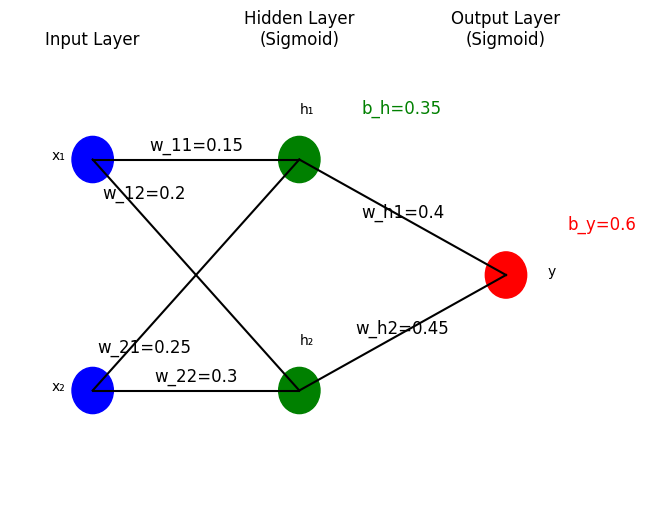

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the network structure
input_neurons = 2
hidden_neurons = 2
output_neurons = 1

# Weights and biases from the example
weights_input_hidden = np.array([[0.15, 0.2], [0.25, 0.3]])  # w11, w12, w21, w22
weights_hidden_output = np.array([0.4, 0.45])  # w_h1, w_h2
bias_hidden = 0.35  # b_h
bias_output = 0.6   # b_y

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Positions for neurons in straight rows
input_pos = np.array([[0, 0.75], [0, 0.25]])  # x1, x2
hidden_pos = np.array([[0.5, 0.75], [0.5, 0.25]])  # h1, h2
output_pos = np.array([[1, 0.5]])  # y

# Draw neurons
for pos in input_pos:
    ax.add_patch(plt.Circle(pos, 0.05, color='blue', fill=True))
for pos in hidden_pos:
    ax.add_patch(plt.Circle(pos, 0.05, color='green', fill=True))
for pos in output_pos:
    ax.add_patch(plt.Circle(pos, 0.05, color='red', fill=True))

# Draw connections and label weights with offset to avoid overlap
for i in range(input_neurons):
    for j in range(hidden_neurons):
        ax.plot([input_pos[i][0], hidden_pos[j][0]], [input_pos[i][1], hidden_pos[j][1]], 'k-')
        if i != j:
            mid_x = (input_pos[i][0] + hidden_pos[j][0]) / 4
            mid_y = (input_pos[i][1] + hidden_pos[j][1]) / (3 / (j + 1))
            ax.text(mid_x , mid_y , f'w_{i+1}{j+1}={weights_input_hidden[i][j]}', fontsize=12, ha='center')
            continue
        # Calculate midpoint for label placement
        mid_x = (input_pos[i][0] + hidden_pos[j][0]) / 2
        mid_y = (input_pos[i][1] + hidden_pos[j][1]) / 2 + 0.02
        ax.text(mid_x , mid_y , f'w_{i+1}{j+1}={weights_input_hidden[i][j]}', fontsize=12, ha='center')

for i in range(hidden_neurons):
    ax.plot([hidden_pos[i][0], output_pos[0][0]], [hidden_pos[i][1], output_pos[0][1]], 'k-')
    # Label weights
    mid_x = (hidden_pos[i][0] + output_pos[0][0]) / 2
    mid_y = (hidden_pos[i][1] + output_pos[0][1]) / 2
    ax.text(mid_x, mid_y, f'w_h{i+1}={weights_hidden_output[i]}', fontsize=12, ha='center')

# Draw biases
ax.text(hidden_pos[0][0] + 0.15, hidden_pos[0][1] + 0.1, f'b_h={bias_hidden}', fontsize=12, color='green')
ax.text(output_pos[0][0] + 0.15, output_pos[0][1] + 0.1, f'b_y={bias_output}', fontsize=12, color='red')

# Label neurons
ax.text(input_pos[0][0] - 0.1, input_pos[0][1], 'x₁', fontsize=10)
ax.text(input_pos[1][0] - 0.1, input_pos[1][1], 'x₂', fontsize=10)
ax.text(hidden_pos[0][0], hidden_pos[0][1] + 0.1, 'h₁', fontsize=10)
ax.text(hidden_pos[1][0], hidden_pos[1][1] + 0.1, 'h₂', fontsize=10)
ax.text(output_pos[0][0] + 0.1, output_pos[0][1], 'y', fontsize=10)

# Label layers
ax.text(0, 1, 'Input Layer', fontsize=12, ha='center')
ax.text(0.5, 1, 'Hidden Layer\n(Sigmoid)', fontsize=12, ha='center')
ax.text(1, 1, 'Output Layer\n(Sigmoid)', fontsize=12, ha='center')

# Set limits and remove axes
ax.set_xlim(-0.2, 1.3)
ax.set_ylim(0, 1)
ax.axis('off')

# Display the plot in Colab
plt.show()

For example, we simple feedforward neural network with one hidden layer. The network has:

* Input layer: 2 neurons ($x_1$, $x_2$)
* Hidden layer: 2 neurons ($h_1$, $h_2$) with sigmoid activation
* Output layer: 1 neuron ($y$) with sigmoid activation
* Loss function: Mean Squared Error (MSE)

We’ll compute gradients and update weights for one training example with
Input: $x = [x_1, x_2] = [0.5, 0.1]$. Target output: $t = 0.8$

Weights and biases (randomly initialized):

* Input to hidden: $w_{11} = 0.15$, $w_{12} = 0.2$, $w_{21} = 0.25$, $w_{22} = 0.3$

* Hidden to output: $w_{h1} = 0.4$, $w_{h2} = 0.45$

* Biases: $b_h = 0.35$ (hidden), $b_y = 0.6$ (output)

* Learning rate: $\eta = 0.5$

* Activation function: Sigmoid, $\sigma(z) = \frac{1}{1 + e^{-z}}$,

* Derivative: $\sigma'(z) = \sigma(z)(1 - \sigma(z))$

The network structure is:

* Input: $x_1$, $x_2$

* Hidden: $h_1 = \sigma(w_{11}x_1 + w_{21}x_2 + b_h)$, $h_2 = \sigma(w_{12}x_1 + w_{22}x_2 + b_h)$

* Output: $y = \sigma(w_{h1}h_1 + w_{h2}h_2 + b_y)$

* Loss: $E = \frac{1}{2}(t - y)^2$


<font color='red'>Step 1: Forward Pass. Compute the activations of all neurons. </font>

Hidden Layer:

Net input to $h_1$:$$z_{h1} = w_{11}x_1 + w_{21}x_2 + b_h = (0.15)(0.5) + (0.25)(0.1) + 0.35 = 0.075 + 0.025 + 0.35 = 0.45$$$$h_1 = \sigma(z_{h1}) = \frac{1}{1 + e^{-0.45}} \approx 0.6106$$

Net input to $h_2$:$$z_{h2} = w_{12}x_1 + w_{22}x_2 + b_h = (0.2)(0.5) + (0.3)(0.1) + 0.35 = 0.1 + 0.03 + 0.35 = 0.48$$$$h_2 = \sigma(z_{h2}) = \frac{1}{1 + e^{-0.48}} \approx 0.6177$$


Output Layer:

Net input to $y$:$$z_y = w_{h1}h_1 + w_{h2}h_2 + b_y = (0.4)(0.6106) + (0.45)(0.6177) + 0.6 \approx 0.2442 + 0.2780 + 0.6 = 1.1222$$$$y = \sigma(z_y) = \frac{1}{1 + e^{-1.1222}} \approx 0.7546$$

Loss:$$E = \frac{1}{2}(t - y)^2 = \frac{1}{2}(0.8 - 0.7546)^2 = \frac{1}{2}(0.0454)^2 \approx 0.00103$$

<font color='red'> Step 2: Backward Pass (Compute Gradients) </font>

We compute the partial derivatives of the loss $E$ with respect to each weight and bias, starting from the output layer and moving backward.
Output Layer Gradients:

Error term for output neuron:$$\delta_y = \frac{\partial E}{\partial y} \cdot \sigma'(z_y)$$

Loss derivative: $\frac{\partial E}{\partial y} = -(t - y) = -(0.8 - 0.7546) = -0.0454$
Sigmoid derivative: $\sigma'(z_y) = y(1 - y) = 0.7546(1 - 0.7546) \approx 0.1851$
$\delta_y = -0.0454 \cdot 0.1851 \approx -0.0084$


Gradients for weights to output:$$\frac{\partial E}{\partial w_{h1}} = \delta_y \cdot h_1 = -0.0084 \cdot 0.6106 \approx -0.00513$$$$\frac{\partial E}{\partial w_{h2}} = \delta_y \cdot h_2 = -0.0084 \cdot 0.6177 \approx -0.00519$$

Gradient for output bias:$$\frac{\partial E}{\partial b_y} = \delta_y = -0.0084$$


Hidden Layer Gradients:

Error terms for hidden neurons:$$\delta_{h1} = \left( w_{h1} \cdot \delta_y \right) \cdot \sigma'(z_{h1})$$

$w_{h1} \cdot \delta_y = 0.4 \cdot (-0.0084) \approx -0.00336$
Sigmoid derivative: $\sigma'(z_{h1}) = h_1(1 - h_1) = 0.6106(1 - 0.6106) \approx 0.2379$
$\delta_{h1} = -0.00336 \cdot 0.2379 \approx -0.0008$

$$\delta_{h2} = \left( w_{h2} \cdot \delta_y \right) \cdot \sigma'(z_{h2})$$

$w_{h2} \cdot \delta_y = 0.45 \cdot (-0.0084) \approx -0.00378$
Sigmoid derivative: $\sigma'(z_{h2}) = h_2(1 - h_2) = 0.6177(1 - 0.6177) \approx 0.2362$
$\delta_{h2} = -0.00378 \cdot 0.2362 \approx -0.00089$


Gradients for weights to hidden layer:$$\frac{\partial E}{\partial w_{11}} = \delta_{h1} \cdot x_1 = -0.0008 \cdot 0.5 \approx -0.0004$$$$\frac{\partial E}{\partial w_{21}} = \delta_{h1} \cdot x_2 = -0.0008 \cdot 0.1 \approx -0.00008$$$$\frac{\partial E}{\partial w_{12}} = \delta_{h2} \cdot x_1 = -0.00089 \cdot 0.5 \approx -0.000445$$$$\frac{\partial E}{\partial w_{22}} = \delta_{h2} \cdot x_2 = -0.00089 \cdot 0.1 \approx -0.000089$$

Gradient for hidden bias:$$\frac{\partial E}{\partial b_h} = \delta_{h1} + \delta_{h2} = -0.0008 + (-0.00089) \approx -0.00169$$

<font color='red'> Step 3: Update Weights and Biases </font>

Using gradient descent: $w = w - \eta \cdot \frac{\partial E}{\partial w}$.
Output Layer:

$w_{h1} = 0.4 - 0.5 \cdot (-0.00513) = 0.4 + 0.002565 \approx 0.4026$
$w_{h2} = 0.45 - 0.5 \cdot (-0.00519) = 0.45 + 0.002595 \approx 0.4526$
$b_y = 0.6 - 0.5 \cdot (-0.0084) = 0.6 + 0.0042 \approx 0.6042$

Hidden Layer:

$w_{11} = 0.15 - 0.5 \cdot (-0.0004) = 0.15 + 0.0002 \approx 0.1502$
$w_{21} = 0.25 - 0.5 \cdot (-0.00008) = 0.25 + 0.00004 \approx 0.25004$
$w_{12} = 0.2 - 0.5 \cdot (-0.000445) = 0.2 + 0.0002225 \approx 0.2002$
$w_{22} = 0.3 - 0.5 \cdot (-0.000089) = 0.3 + 0.0000445 \approx 0.30004$
$b_h = 0.35 - 0.5 \cdot (-0.00169) = 0.35 + 0.000845 \approx 0.3508$

### Backpropagation Application & Problems

Backpropagation has many application in real life. In the scope of this section, we only separate them into 2 field: inside and outside of Machine Learning (ML).

#### **Machine Learning (ML)**
* Backpropagation is the backbone of training artificial neural networks (ANNs) and is widely used across ML domains:

    - **Image Recognition**: Optimizes weights in convolutional neural networks (CNNs) for tasks like object detection (e.g., identifying objects in images).
    - **Natural Language Processing (NLP)**: Adjusts weights in recurrent neural networks (RNNs) and transformers for tasks like machine translation and text generation.
    - **Speech Recognition**: Fine-tunes deep neural networks to convert audio to text by minimizing prediction errors.

#### **Others**
* **Control Systems**: Optimizes parameters in control algorithms for robotics or autonomous systems, adjusting to minimize error in system dynamics.
  
  $E = \frac{1}{2} (y_{\text{desired}} - y_{\text{actual}})^2$
  
- **Physics Simulations**: Used to fit models to experimental data, such as optimizing parameters in computational fluid dynamics.
- **Economics**: Adjusts weights in econometric models to predict economic trends or optimize resource allocation.
- **Signal Processing**: Fine-tunes filters in adaptive signal processing to minimize noise in communication systems.



### Problems and Challenges with Backpropagation
- **Vanishing/Exploding Gradients**: Throughout Backpropagation workflow, gradients are multiplied across layers, this can lead to two extreme cases:

    Gradients can shrink $( \frac{\partial E}{\partial w} \to 0 )$ or grow  $( \frac{\partial E}{\partial w} \to \infty )$

<font color='red'>This is also called Backpropagation through Time Problem (BPTT)</font>.

- **Overfitting**: Models may memorize training data, requiring regularization like dropout.

- **Computational Complexity**: Training large networks demands significant computational resources (e.g., GPUs).
- **Local Minima**: The algorithm may converge to suboptimal solutions, though this is less critical in high-dimensional spaces.

  $E(w) = \frac{1}{2} \sum (t - y)^2$

- **Initialization Sensitivity**: Poor weight initialization can lead to slow convergence, addressed by methods like Xavier initialization.

Backpropagation’s versatility makes it a powerful tool across domains, though its challenges require tailored solutions depending on the application.

## Comparision & Summary


### Comparison between other Differentiation methods
1. Compare to Numerical Differentiation:

| **Aspect**               | **Numerical Differentiation**                              | **Automatic Differentiation**                            |
|---------------------------|-----------------------------------------------------------|--------------------------------------------------------|
| **Accuracy**             | Approximates derivatives (e.g., $ f'(x) \approx \frac{f(x + h) - f(x)}{h} $). Prone to round-off and truncation errors, accuracy decreases with complex functions or noisy data. | Exact derivatives up to machine precision via computational graph. Avoids approximation errors. |
| **Computational Efficiency** | Requires $ O(n) $ function evaluations for $ n $ parameters (e.g., central differences). Inefficient for **high-dimensional problems**. | Operates at the cost of function evaluation, $ O(n) $ for forward mode or $ O(n) $ per output in reverse mode. **Highly efficient for complex models**. |
| **Implementation Complexity** | Simple to implement (e.g., finite difference formula). Requires tuning step size $ h $ to balance accuracy and error. | Requires computational graph (handled by frameworks like TensorFlow or PyTorch). Complex manually but integrated into ML libraries. |
| **Applicability**        | Suitable for simple functions or black-box models where derivatives are unavailable. Struggles with high-dimensional or noisy data. | Excels in ML, optimizing deep networks with thousands of parameters. Applicable to any computable function, including those with control flow. |
| **Memory Usage**         | Minimal memory, stores only function evaluations.         | Moderate to high memory usage (forward mode stores intermediates, reverse mode stores graph). Scales with outputs in reverse mode. |
| **Mathematical Insight** | $ f'(x) \approx \frac{f(x + h) - f(x - h)}{2h} $ (error $ O(h^2) $). | Computes $ \frac{\partial E}{\partial w} $ by chaining partial derivatives (e.g., $ \frac{\partial E}{\partial w} = \frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial w} $), exact and efficient. |

2. Compare to Symbolic Differentiation:

| **Aspect**               | **Symbolic Differentiation**                              | **Automatic Differentiation**                            |
|---------------------------|-----------------------------------------------------------|--------------------------------------------------------|
| **Accuracy**             | Provides exact derivatives (e.g., $ \frac{d}{dx}(x^2) = 2x $). No approximation errors, but suffers from expression swell with large expressions. | Delivers exact derivatives up to machine precision via computational graph. |
| **Computational Efficiency** | Computationally expensive due to symbolic manipulation and simplification. Exponential growth in complexity with nested functions. | Operates at the cost of function evaluation, $ O(n) $ for forward mode or $ O(n) $ per output in reverse mode. Highly efficient for complex models. |
| **Implementation Complexity** | Requires a symbolic math engine (e.g., SymPy), complex for large systems. Impractical for dynamic computations. | Requires computational graph (handled by frameworks like TensorFlow or PyTorch). Complex manually but integrated into ML libraries. |
| **Applicability**        | Ideal for analytical derivations or small, static expressions. Impractical for large-scale, data-driven models. | Excels in ML, optimizing deep networks with thousands of parameters. Applicable to any computable function, including those with control flow. |
| **Memory Usage**         | High memory usage due to storing symbolic expressions.   | Moderate to high memory usage (forward mode stores intermediates, reverse mode stores graph). Scales with outputs in reverse mode. |
| **Mathematical Insight** | $ \frac{d}{dx}(e^{x^2}) = 2x e^{x^2} $, exact but grows with complexity. | Computes $ \frac{\partial E}{\partial w} $ by chaining partial derivatives (e.g., $ \frac{\partial E}{\partial w} = \frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial w} $), exact and efficient. |

3. Insights:
- **Numerical Differentiation** is simple but inaccurate and inefficient for large systems.
- **Symbolic Differentiation** is precise but impractical for dynamic, large-scale problems.
- **Automatic Differentiation** strikes a balance, offering exactness and efficiency, making it the preferred choice for modern machine.

### Comparison between Forward and Backward mode
| Feature                     | Forward Mode AD                          | Backward Mode AD                         |
|-----------------------------|------------------------------------------|------------------------------------------|
| **Definition**              | Computes derivatives alongside function evaluation, propagating derivatives forward. | Computes derivatives by backpropagating gradients from output to input. |
| **Computation Direction**   | Forward: from inputs to outputs.         | Backward: from outputs to inputs.        |
| **Derivative Propagation**  | Accumulates derivatives (tangents) during forward pass. | Accumulates gradients during backward pass. |
| **Efficiency**              | Efficient for functions with few inputs and many outputs (e.g., $ f: \mathbb{R}^n \to \mathbb{R}^m $, $ n \ll m $). | Efficient for functions with many inputs and few outputs (e.g., $ f: \mathbb{R}^n \to \mathbb{R}^m $, $ n \gg m $). |
| **Memory Usage**            | Lower memory for small input dimensions; stores intermediate tangents. | Higher memory; stores intermediate activations for backward pass. |
| **Use Case**                | Real-time systems, sensitivity analysis for small input spaces. | Neural network training, optimization problems with scalar loss. |
| **Implementation Complexity** | Simpler to implement for small systems.  | More complex, requires reverse computation graph. |
| **Example Application**     | Computing Jacobians for small systems.   | Gradient computation in deep learning.   |
| **Scalability**             | Scales poorly with large input dimensions. | Scales well with large input dimensions. |

### Recommended usage for each mode
**Forward Mode:**
* Good when you have a small number of inputs (e.g., 2–3 parameters).
* Ideal for Jacobian-vector products: e.g., computing directional derivatives.

**Backward Mode:**
* When you have many inputs and one output (e.g., loss function in neural nets).
* Ideal for training machine learning models (via backpropagation).



# Visualization



In [ ]:
!pip install autograd


In [ ]:
import autograd.numpy as np # Sử dụng numpy của autograd
from autograd import grad

def my_function(x):
  return np.sin(x)

# Tạo hàm tính đạo hàm bằng grad
grad_my_function = grad(my_function)

# Tính đạo hàm tại x = pi/3
x_value = np.pi / 3
derivative_at_x = grad_my_function(x_value)

print(f"Hàm số: f(x) = sin(x)")
print(f"Giá trị x: {x_value:.4f} (tức là pi/3)")
print(f"Đạo hàm f'(x) tại x = pi/3 là: {derivative_at_x:.4f}") # cos(pi/3) = 0.5
print(f"Giá trị cos(pi/3) để so sánh: {np.cos(x_value):.4f}")

Hàm số: f(x) = sin(x)
Giá trị x: 1.0472 (tức là pi/3)
Đạo hàm f'(x) tại x = pi/3 là: 0.5000
Giá trị cos(pi/3) để so sánh: 0.5000


In [ ]:
import autograd.numpy as np
from autograd import grad

def f(x):
  return x**3

# Đạo hàm bậc 1
grad_f = grad(f)

# Đạo hàm bậc 2
grad_f_order_2 = grad(grad_f)

# Đạo hàm bậc 3
grad_f_order_3 = grad(grad_f_order_2)

x_value = 2.0
print(f"Hàm số: f(x) = x^3")
print(f"Giá trị x: {x_value}")
print(f"f'(x) = 3*x^2, tại x={x_value}, f'({x_value}) = {grad_f(x_value)}") # 3 * 2^2 = 12
# Sửa tên biến trong print:
print(f"f''(x) = 6*x, tại x={x_value}, f''({x_value}) = {grad_f_order_2(x_value)}") # 6 * 2 = 12
# Sửa tên biến trong print:
print(f"f'''(x) = 6, tại x={x_value}, f'''({x_value}) = {grad_f_order_3(x_value)}") # 6


Hàm số: f(x) = x^3
Giá trị x: 2.0
f'(x) = 3*x^2, tại x=2.0, f'(2.0) = 12.0
f''(x) = 6*x, tại x=2.0, f''(2.0) = 12.0
f'''(x) = 6, tại x=2.0, f'''(2.0) = 6.0


In [ ]:
import autograd.numpy as np
from autograd import grad

# Hàm này nhận vào một vector (hoặc tuple) các tham số
# Mặc định, grad sẽ tính đạo hàm theo tham số đầu tiên (argnum=0)
# Để tính theo các tham số khác, hoặc nhiều tham số, cần chỉ định

def multi_var_func(params):
  x1, x2 = params # params là một array/list/tuple [x1, x2]
  return x1**2 * x2 + np.sin(x1)

# Tính gradient theo `params` (là một vector)
grad_multi_var = grad(multi_var_func)

params_values = np.array([1.0, 2.0]) # x1 = 1.0, x2 = 2.0
gradient_values = grad_multi_var(params_values)

print(f"Hàm số: f(x1, x2) = x1^2 * x2 + sin(x1)")
print(f"Giá trị (x1, x2): ({params_values[0]}, {params_values[1]})")
print(f"Gradient (df/dx1, df/dx2) tại điểm đó là: {gradient_values}")

# Kiểm tra bằng tay:
# df/dx1 = 2*x1*x2 + cos(x1) = 2*1*2 + cos(1) = 4 + 0.5403 = 4.5403
# df/dx2 = x1^2 = 1^2 = 1
# Nên gradient là [4.5403, 1.0]
print(f"Kiểm tra df/dx1: {2*params_values[0]*params_values[1] + np.cos(params_values[0]):.4f}")
print(f"Kiểm tra df/dx2: {params_values[0]**2:.4f}")

# Nếu hàm của bạn nhận các biến riêng lẻ thay vì một vector:
# def multi_var_func_v2(x1, x2):
# return x1**2 * x2 + np.sin(x1)

# grad_v2_dx1 = grad(multi_var_func_v2, argnum=0) # Đạo hàm theo x1
# grad_v2_dx2 = grad(multi_var_func_v2, argnum=1) # Đạo hàm theo x2
# print(f"df/dx1 (cách 2): {grad_v2_dx1(1.0, 2.0)}")
# print(f"df/dx2 (cách 2): {grad_v2_dx2(1.0, 2.0)}")

Hàm số: f(x1, x2) = x1^2 * x2 + sin(x1)
Giá trị (x1, x2): (1.0, 2.0)
Gradient (df/dx1, df/dx2) tại điểm đó là: [4.54030231 1.        ]
Kiểm tra df/dx1: 4.5403
Kiểm tra df/dx2: 1.0000


Tham số ban đầu (w,b): [0.85843164 0.84494926]
Epoch 20/200, Loss: 0.0899, w: 0.8727, b: 0.8012
Epoch 40/200, Loss: 0.0805, w: 0.8836, b: 0.7594
Epoch 60/200, Loss: 0.0723, w: 0.8938, b: 0.7201
Epoch 80/200, Loss: 0.0650, w: 0.9035, b: 0.6832
Epoch 100/200, Loss: 0.0586, w: 0.9125, b: 0.6484
Epoch 120/200, Loss: 0.0529, w: 0.9211, b: 0.6157
Epoch 140/200, Loss: 0.0478, w: 0.9291, b: 0.5850
Epoch 160/200, Loss: 0.0434, w: 0.9366, b: 0.5560
Epoch 180/200, Loss: 0.0394, w: 0.9437, b: 0.5288
Epoch 200/200, Loss: 0.0359, w: 0.9504, b: 0.5033
Tham số tối ưu (w,b): [0.95036027 0.50325097]
Loss cuối cùng: 0.0359


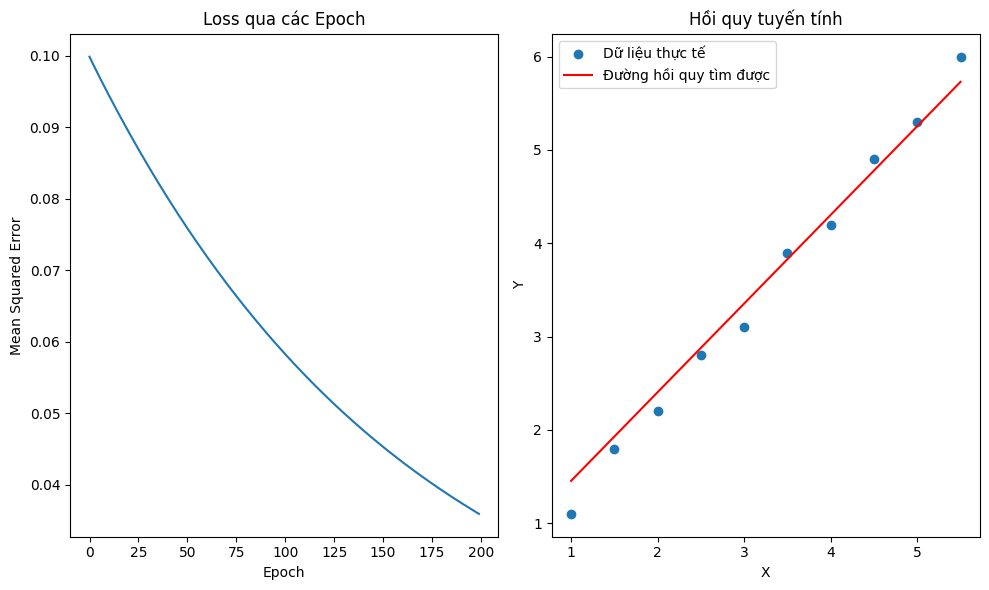

In [ ]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt # Để vẽ đồ thị

# Dữ liệu giả lập
X_data = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5])
Y_data = np.array([1.1, 1.8, 2.2, 2.8, 3.1, 3.9, 4.2, 4.9, 5.3, 6.0])

# Hàm mô hình tuyến tính
def linear_model(params, x):
  w, b = params
  return w * x + b

# Hàm mất mát (Mean Squared Error - MSE)
def mse_loss(params): # params là (w, b)
  predictions = linear_model(params, X_data)
  return np.mean((predictions - Y_data)**2)

# Tính gradient của hàm mất mát theo params (w,b)
gradient_loss = grad(mse_loss)

# Khởi tạo tham số
# np.random.seed(42) # Để kết quả có thể lặp lại
params = np.array([np.random.rand(), np.random.rand()]) # [w, b] ngẫu nhiên
# Hoặc khởi tạo cụ thể
# params = np.array([0.5, 0.5])


learning_rate = 0.01
num_epochs = 200
loss_history = []

print(f"Tham số ban đầu (w,b): {params}")

for epoch in range(num_epochs):
  # Tính gradient
  gradients = gradient_loss(params)

  # Cập nhật tham số
  params = params - learning_rate * gradients

  # Ghi lại loss
  current_loss = mse_loss(params)
  loss_history.append(current_loss)

  if (epoch + 1) % 20 == 0:
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {current_loss:.4f}, w: {params[0]:.4f}, b: {params[1]:.4f}")

print(f"Tham số tối ưu (w,b): {params}")
print(f"Loss cuối cùng: {mse_loss(params):.4f}")

# Trực quan hóa (Visualization)
plt.figure(figsize=(10, 6))

# Đồ thị loss
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss qua các Epoch")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

# Đồ thị dữ liệu và đường hồi quy
plt.subplot(1, 2, 2)
plt.scatter(X_data, Y_data, label='Dữ liệu thực tế')
plt.plot(X_data, linear_model(params, X_data), color='red', label='Đường hồi quy tìm được')
plt.title("Hồi quy tuyến tính")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()

!pip uninstall -y autograd
!pip install --no-cache-dir autograd

Hàm số: f(x1, x2) = x1 * sin(x2)
Tại điểm (x1, x2) = (2.00, 1.05)

Giá trị hàm f(x1, x2) tại điểm đang xét = 1.7321
Đạo hàm riêng df/dx1 (tính bằng Forward Mode): 0.8660
So sánh với giải tích: df/dx1 = sin(1.05) = 0.8660

Đạo hàm riêng df/dx2 (tính bằng Forward Mode): 1.0000
So sánh với giải tích: df/dx2 = 2.00 * cos(1.05) = 1.0000



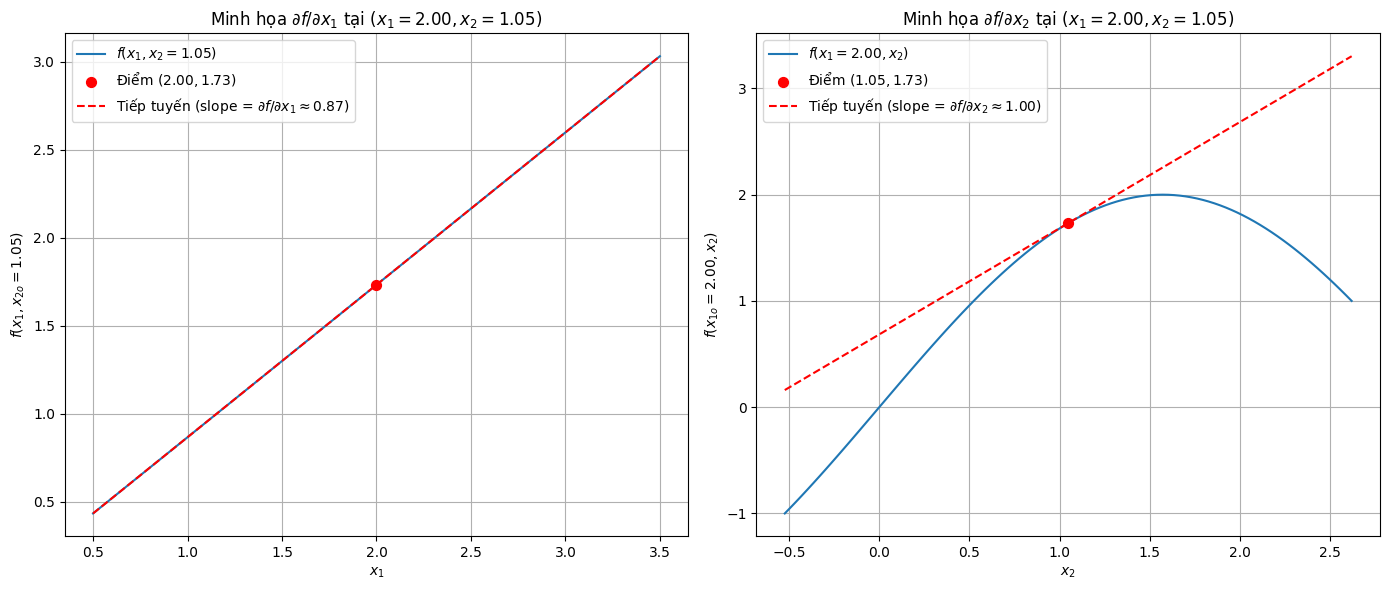

In [ ]:

# Bước 1: Import các thư viện cần thiết
import autograd.numpy as np # Quan trọng: dùng numpy của autograd
from autograd import make_jvp # Sử dụng make_jvp cho autograd 1.8.0+
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Cho vẽ đồ thị 3D nếu bạn muốn mở rộng

# Bước 2: Định nghĩa hàm số f(x1, x2)
def f(params):
  x1, x2 = params
  return x1 * np.sin(x2)

# Bước 3: Chọn điểm để tính đạo hàm
x1_val = 2.0
x2_val = np.pi / 3 # Khoảng 1.047 rad (60 độ)
point = np.array([x1_val, x2_val]) # Tạo array từ autograd.numpy

print(f"Hàm số: f(x1, x2) = x1 * sin(x2)")
print(f"Tại điểm (x1, x2) = ({x1_val:.2f}, {x2_val:.2f})\n")

# --- Bước 4: Tính đạo hàm riêng theo x1 (Forward mode pass 1) ---
# Seed vector cho x1: v = (1.0, 0.0)
seed_vector_x1 = np.array([1.0, 0.0]) # Tạo array từ autograd.numpy

# 4.1: Tạo "trình xây dựng JVP" cho hàm f
jvp_builder_for_f = make_jvp(f) # Mặc định argnum=0 (đạo hàm theo 'params')

# 4.2: Áp dụng giá trị đầu vào (point) cho trình xây dựng.
# Hàm này sẽ trả về một hàm mới chờ vector tiếp tuyến 'g'.
jvp_calculator_at_point_x1 = jvp_builder_for_f(point)

# 4.3: Gọi hàm mới này với seed_vector_x1 (chính là 'g') để nhận kết quả
primal_output_x1, tangent_output_x1 = jvp_calculator_at_point_x1(seed_vector_x1)

print(f"Giá trị hàm f(x1, x2) tại điểm đang xét = {primal_output_x1:.4f}")
print(f"Đạo hàm riêng df/dx1 (tính bằng Forward Mode): {tangent_output_x1:.4f}")

# Kiểm tra bằng giải tích: df/dx1 = sin(x2)
analytical_dfdx1 = np.sin(x2_val)
print(f"So sánh với giải tích: df/dx1 = sin({x2_val:.2f}) = {analytical_dfdx1:.4f}\n")


# --- Bước 5: Tính đạo hàm riêng theo x2 (Forward mode pass 2) ---
# Seed vector cho x2: v = (0.0, 1.0)
seed_vector_x2 = np.array([0.0, 1.0]) # Tạo array từ autograd.numpy

# Sử dụng lại jvp_builder_for_f và point
jvp_calculator_at_point_x2 = jvp_builder_for_f(point)
primal_output_x2, tangent_output_x2 = jvp_calculator_at_point_x2(seed_vector_x2)

# Lưu ý: primal_output_x2 sẽ giống primal_output_x1 vì hàm và điểm tính toán là như nhau
print(f"Đạo hàm riêng df/dx2 (tính bằng Forward Mode): {tangent_output_x2:.4f}")

# Kiểm tra bằng giải tích: df/dx2 = x1 * cos(x2)
analytical_dfdx2 = x1_val * np.cos(x2_val)
print(f"So sánh với giải tích: df/dx2 = {x1_val:.2f} * cos({x2_val:.2f}) = {analytical_dfdx2:.4f}\n")

# --- Bước 6: Vẽ đồ thị minh họa ---
plt.figure(figsize=(14, 6))

# Đồ thị minh họa cho df/dx1
plt.subplot(1, 2, 1)
x1_range_plot = np.linspace(x1_val - 1.5, x1_val + 1.5, 100)
# Giữ x2 cố định tại x2_val
y_values_for_dx1_plot = np.array([f(np.array([x_plot, x2_val])) for x_plot in x1_range_plot])
plt.plot(x1_range_plot, y_values_for_dx1_plot, label=f'$f(x_1, x_2={x2_val:.2f})$')
plt.scatter([x1_val], [primal_output_x1], color='red', s=50, zorder=5, label=f'Điểm $( {x1_val:.2f}, {primal_output_x1:.2f} )$')

# Vẽ đường tiếp tuyến cho df/dx1
tangent_line_x1_plot = primal_output_x1 + tangent_output_x1 * (x1_range_plot - x1_val)
plt.plot(x1_range_plot, tangent_line_x1_plot, 'r--', label=f'Tiếp tuyến (slope = $\\partial f/\\partial x_1 \\approx {tangent_output_x1:.2f}$)')
plt.xlabel("$x_1$")
plt.ylabel(f'$f(x_1, x_{{2o}}={x2_val:.2f})$') # Sử dụng {{}} để hiển thị {2o}
plt.title(f'Minh họa $\\partial f/\\partial x_1$ tại $(x_1={x1_val:.2f}, x_2={x2_val:.2f})$')
plt.legend()
plt.grid(True)

# Đồ thị minh họa cho df/dx2
plt.subplot(1, 2, 2)
x2_range_plot = np.linspace(x2_val - np.pi/2, x2_val + np.pi/2, 100)
# Giữ x1 cố định tại x1_val
y_values_for_dx2_plot = np.array([f(np.array([x1_val, x_plot])) for x_plot in x2_range_plot])
plt.plot(x2_range_plot, y_values_for_dx2_plot, label=f'$f(x_1={x1_val:.2f}, x_2)$')
plt.scatter([x2_val], [primal_output_x2], color='red', s=50, zorder=5, label=f'Điểm $( {x2_val:.2f}, {primal_output_x2:.2f} )$')

# Vẽ đường tiếp tuyến cho df/dx2
tangent_line_x2_plot = primal_output_x2 + tangent_output_x2 * (x2_range_plot - x2_val)
plt.plot(x2_range_plot, tangent_line_x2_plot, 'r--', label=f'Tiếp tuyến (slope = $\\partial f/\\partial x_2 \\approx {tangent_output_x2:.2f}$)')
plt.xlabel("$x_2$")
plt.ylabel(f'$f(x_{{1o}}={x1_val:.2f}, x_2)$') # Sử dụng {{}} để hiển thị {1o}
plt.title(f'Minh họa $\\partial f/\\partial x_2$ tại $(x_1={x1_val:.2f}, x_2={x2_val:.2f})$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Exercises (1-4)

1. Why is the second derivative much more expensive to compute than the first derivative?
1. After running the function for backpropagation, immediately run it again and see what happens. Investigate.
1. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?
1. Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.

# Exercises (1-4)

1. Why is the second derivative much more expensive to compute than the first derivative?
1. After running the function for backpropagation, immediately run it again and see what happens. Investigate.
1. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?
1. Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.


## Answers
**Exercise 1**

**Question**: Why is the second derivative much more expensive to compute than the first derivative?

**Solution**:

The second derivative involves computing the **Hessian matrix**, which contains all possible second-order partial derivatives of a function. If a function *f* has *n* input variables:

- The **gradient** is a vector of size *n*.
- The **Hessian** is a matrix of size *n × n*, i.e., it has *n²* elements.

This means the computational cost increases quadratically with the number of variables. Hence, calculating second-order derivatives is significantly more expensive.
Hence, calculating second-order derivatives is significantly more expensive.

**Exercise 2**

**Question**: After running the function for backpropagation, immediately run it again and see what happens. Investigate.

```python
import torch

x = torch.arange(4.0, requires_grad=True)
y = 2 * torch.dot(x, x)
y.backward()
print(x.grad)  # tensor([ 0.,  4.,  8., 12.])

# Second backward without clearing
y.backward()
print(x.grad)  # tensor([ 0.,  8., 16., 24.]) - accumulated

# Proper way: zero out gradient
x.grad.zero_()
y.backward()
print(x.grad)  # tensor([ 0.,  4.,  8., 12.])

```
Without retain_graph=True, `PyTorch` clears the computational graph after backward pass to save memory

The gradients accumulate when you run backward twice

The output shows [0, 8, 16, 24] because:

First backward: gradient is 4x → [0, 4, 8, 12]

Second backward: adds another 4x → [0+0, 4+4, 8+8, 12+12]

**Exercise 3**

**Question**: In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?

```python
import torch

def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(2,3), requires_grad=True)
d = f(a)
d.backward(torch.ones_like(d))  # Need to provide gradient of output shape
print(a.grad)
```
- When output is non-scalar, must provide gradient tensor of same shape

- d.detach() works but isn't conceptually correct - should use ones/identity matrix

- The gradient scales with the number of doublings in the while loop

**Exercise 4**

**Question**: Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.

```python
import torch

def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(2, 3), requires_grad=True)
d = f(a)
d.backward(torch.ones_like(d))  # Gradient must be provided
print(a.grad)

```



# Exercises (5-8)
1. Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.
1. Use the chain rule to compute the derivative $\frac{df}{dx}$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.
1. Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as *forward differentiation*, whereas the path from $f$ to $x$ is known as backward differentiation.
1. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.



#### **5. Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.**

The function is given by:

<p align="center">$ f(x) = ((\log x^2) \cdot \sin x) + x^{-1} $</p>

Since $\log x^2 = 2 \log |x|$, we rewrite it as:

$ f(x) = (2 \log |x| \cdot \sin x) + \frac{1}{x} $

We construct a dependency graph to trace the computation from the input $x$ to the output $f(x)$. Each node represents a variable or operation, and edges represent dependencies.

#### *Dependency Graph*

The computational steps are:
1. Input: $x$.
2. Compute $|x|$.
3. Compute $\log |x|$.
4. Compute $2 \log |x|$.
5. Compute $\sin x$.
6. Compute the product $2 \log |x| \cdot \sin x$.
7. Compute $x^{-1} = \frac{1}{x}$.
8. Compute $f(x) = (2 \log |x| \cdot \sin x) + x^{-1}$.

#### *Graph Structure*
- **Nodes**:
  - $x$: Input.
  - $|x|$: Absolute value of $x$.
  - $\log |x|$: Logarithm of $|x|$.
  - $2 \log |x|$: Scaled logarithm.
  - $\sin x$: Sine of $x$.
  - $\text{product}$: $2 \log |x| \cdot \sin x$.
  - $x^{-1}$: Inverse of $x$.
  - $f(x)$: Final output.
- **Edges**:
  - $x \to |x|$
  - $|x| \to \log |x|$
  - $\log |x| \to 2 \log |x|$
  - $x \to \sin x$
  - $2 \log |x|, \sin x \to \text{product}$
  - $x \to x^{-1}$
  - $\text{product}, x^{-1} \to f(x)$

In [ ]:
!pip install networkx matplotlib

In [ ]:
# Install required libraries (run in terminal or notebook if not installed)
# !pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes (representing variables or operations)
nodes = [
    "x",
    "x^2",
    "log(x^2)",
    "sin(x)",
    "log(x^2) * sin(x)",
    "x^(-1)",
    "f(x)"
]
G.add_nodes_from(nodes)

# Add edges (representing dependencies)
edges = [
    ("x", "x^2"),
    ("x^2", "log(x^2)"),
    ("x", "sin(x)"),
    ("log(x^2)", "log(x^2) * sin(x)"),
    ("sin(x)", "log(x^2) * sin(x)"),
    ("x", "x^(-1)"),
    ("log(x^2) * sin(x)", "f(x)"),
    ("x^(-1)", "f(x)")
]
G.add_edges_from(edges)

# Define node positions using a hierarchical layout
pos = {
    "x": (0, 4),
    "x^2": (-1, 3),
    "sin(x)": (1, 3),
    "log(x^2)": (-1, 2),
    "x^(-1)": (1, 2),
    "log(x^2) * sin(x)": (0, 1),
    "f(x)": (0, 0)
}

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=2000,
    font_size=10,
    font_weight="bold",
    arrowsize=20
)
plt.title("Dependency Graph for f(x) = (log(x^2) * sin(x)) + x^(-1)", fontsize=12)
plt.show()

#### **6. Use the chain rule to compute the derivative $\frac{df}{dx}$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.**

The function is given by:

$f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$

Since $\log x^2 = 2 \log |x|$, we can rewrite the function as:

$f(x) = (2 \log |x| \cdot \sin x) + \frac{1}{x}$

We construct a dependency graph to trace the computation from the input $x$ to the output $f(x)$. Each node represents a variable or operation, and edges represent dependencies.

#### *Dependency Graph*

The computational steps are:
1. Input: $x$.
2. Compute $|x|$.
3. Compute $\log |x|$.
4. Compute $2 \log |x|$.
5. Compute $\sin x$.
6. Compute the product $2 \log |x| \cdot \sin x$.
7. Compute $x^{-1} = \frac{1}{x}$.
8. Compute $f(x) = (2 \log |x| \cdot \sin x) + x^{-1}$.

In [ ]:
import numpy as np

def compute_f(x):
    if x == 0:
        raise ValueError("Function undefined at x=0")
    # Step 1: Input x
    # Step 2: Compute |x|
    abs_x = np.abs(x)
    # Step 3: Compute log|x|
    log_abs_x = np.log(abs_x)
    # Step 4: Compute 2*log|x|
    scaled_log = 2 * log_abs_x
    # Step 5: Compute sin(x)
    sin_x = np.sin(x)
    # Step 6: Compute product
    product = scaled_log * sin_x
    # Step 7: Compute x^(-1)
    x_inv = 1 / x
    # Step 8: Compute f(x)
    result = product + x_inv
    return result

# Example computation
try:
    x = 1.0
    print(f"f({x}) = {compute_f(x)}")
except ValueError as e:
    print(e)

In [ ]:
import numpy as np

def compute_f(x):
    if x == 0:
        raise ValueError("Function undefined at x=0")
    # Step 1: Input x
    # Step 2: Compute |x|
    abs_x = np.abs(x)
    # Step 3: Compute log|x|
    log_abs_x = np.log(abs_x)
    # Step 4: Compute 2*log|x|
    scaled_log = 2 * log_abs_x
    # Step 5: Compute sin(x)
    sin_x = np.sin(x)
    # Step 6: Compute product
    product = scaled_log * sin_x
    # Step 7: Compute x^(-1)
    x_inv = 1 / x
    # Step 8: Compute f(x)
    result = product + x_inv
    return result

# Example computation
try:
    x = 1.0
    print(f"f({x}) = {compute_f(x)}")
except ValueError as e:
    print(e)

 #### **7. Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as *****forward differentiation*****, whereas the path from $f$ to $x$ is known as backward differentiation.**

The function is:
$f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$

Rewritten using $\log x^2 = 2 \log |x|$:
$f(x) = (2 \log |x| \cdot \sin x) + \frac{1}{x}$

We compute the derivative $f'(x)$ using:
1. **Forward Differentiation**: Propagating derivatives from $x$ to $f(x)$.
2. **Backward Differentiation**: Propagating sensitivities from $f(x)$ to $x$.

Both methods follow the dependency graph:
- Nodes: $x$, $|x|$, $\log |x|$, $2 \log |x|$, $\sin x$, $\text{product} = 2 \log |x| \cdot \sin x$, $x^{-1}$, $f(x)$.
- Edges define dependencies as shown in the previous section.

#### *Forward Differentiation*
In forward mode, we compute $\dot{v} = \frac{dv}{dx}$ for each node $v$, starting with $\dot{x} = 1$.

##### Steps
1. $x$: $\dot{x} = 1$.
2. $|x|$: $\dot{|x|} = \text{sgn}(x)$.
3. $\log |x|$: $\dot{\log |x|} = \frac{1}{x}$.
4. $2 \log |x|$: $\dot{2 \log |x|} = \frac{2}{x}$.
5. $\sin x$: $\dot{\sin x} = \cos x$.
6. $\text{product} = 2 \log |x| \cdot \sin x$: $\dot{\text{product}} = \frac{2}{x} \sin x + 2 \log |x| \cos x$.
7. $x^{-1}$: $\dot{x^{-1}} = -\frac{1}{x^2}$.
8. $f(x) = \text{product} + x^{-1}$: $\dot{f} = \frac{2 \sin x}{x} + 2 \log |x| \cos x - \frac{1}{x^2}$.

#### *Backward Differentiation*
In backward mode, we compute $\bar{v} = \frac{\partial f}{\partial v}$, starting with $\bar{f} = 1$, and propagate sensitivities backward.

##### Steps
1. $f(x)$: $\bar{f} = 1$. For $f = \text{product} + x^{-1}$, $\bar{\text{product}} = 1$, $\bar{x^{-1}} = 1$.
2. $\text{product} = 2 \log |x| \cdot \sin x$: $\bar{2 \log |x|} = \sin x$, $\bar{\sin x} = 2 \log |x|$.
3. $x^{-1}$: Contributes $\bar{x}_q = -\frac{1}{x^2}$.
4. $2 \log |x|$: $\bar{\log |x|} = 2 \sin x$.
5. $\sin x$: Contributes $\bar{x}_v = 2 \log |x| \cos x$.
6. $\log |x|$: $\bar{|x|} = \frac{2 \sin x}{|x|}$.
7. $|x|$: Contributes $\bar{x}_{|x|} = \frac{2 \sin x}{x}$.
8. $x$: Total $\bar{x} = \frac{2 \sin x}{x} + 2 \log |x| \cos x - \frac{1}{x^2}$.

##### Result
Both methods yield:
$f'(x) = \frac{2 \sin x}{x} + 2 \log |x| \cos x - \frac{1}{x^2}$

#### **8. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.**

#### *When to Use Forward vs. Backward Differentiation*

**Forward differentiation** (forward-mode automatic differentiation) and **backward differentiation** (reverse-mode automatic differentiation) are methods to compute gradients of a function. The choice between them depends on the computational context, including the amount of intermediate data, parallelization opportunities, and the dimensions of inputs and outputs (i.e., the size of matrices and vectors involved). Below, we analyze these factors to determine when each method is preferable.

#### *Overview of Forward and Backward Differentiation*

- **Forward Differentiation**:
  - Propagates derivatives from inputs to outputs.
  - For a function $f: \mathbb{R}^n \to \mathbb{R}^m$, it computes the derivative of each output with respect to each input by propagating a "seed" derivative (e.g., $\frac{dx_i}{dx_i} = 1$) through the computational graph.
  - Computes the Jacobian matrix $J$ column by column.

- **Backward Differentiation**:
  - Propagates sensitivities (adjoints) from outputs to inputs.
  - Computes the derivative by starting with the sensitivity of the output (e.g., $\frac{\partial f}{\partial f} = 1$) and working backward through the computational graph.
  - Computes the Jacobian matrix $J$ row by row (or its transpose's effect).

For a function $f(x_1, \dots, x_n) = (f_1, \dots, f_m)$, the Jacobian is an $m \times n$ matrix:
$J = \begin{bmatrix} \frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_n} \\ \vdots & \ddots & \vdots \\ \frac{\partial f_m}{\partial x_1} & \cdots & \frac{\partial f_m}{\partial x_n} \end{bmatrix}$

- Forward mode computes each column (derivatives with respect to one input $x_i$).
- Backward mode computes each row (derivatives of one output $f_j$).

#### *Key Factors for Choosing Between Forward and Backward Differentiation*

#### 1. Amount of Intermediate Data Needed
- **Forward Differentiation**:
  - Requires storing the derivative of each intermediate variable with respect to each input.
  - For $n$ inputs, you need to track $n$ derivative values per node in the computational graph.
  - Memory usage scales with the number of inputs ($O(n)$ per node), which can be significant for large $n$.
  - Intermediate values (e.g., $\sin x$) and their derivatives are computed and can be discarded after use, but all derivatives for a single input are computed in one pass.

- **Backward Differentiation**:
  - Requires storing the sensitivity (adjoint) of each intermediate variable with respect to the output.
  - For $m$ outputs, you need to track $m$ adjoint values per node, but typically only for one output at a time in scalar cases.
  - Memory usage scales with the number of outputs ($O(m)$ per node), but the forward pass values (e.g., $\sin x$) must be stored or recomputed to calculate adjoints.
  - For large graphs, storing the forward pass or recomputing it can increase memory or computation costs.

- **When to Choose**:
  - **Forward**: Prefer when $n$ (number of inputs) is small, as memory scales with $n$. Ideal for functions with few inputs and many outputs ($n \ll m$).
  - **Backward**: Prefer when $m$ (number of outputs) is small, as memory scales with $m$. Ideal for functions with many inputs and few outputs ($m \ll n$), common in machine learning (e.g., scalar loss functions).

#### 2. Ability to Parallelize Steps
- **Forward Differentiation**:
  - Each input's derivative propagation is independent. For $n$ inputs, you can run $n$ forward passes in parallel, computing $\frac{\partial f}{\partial x_i}$ for each $x_i$.
  - Parallelization is straightforward across inputs, as each pass does not depend on others.
  - However, within a single pass, computations follow the dependency graph's topological order, which may limit parallelism if the graph has many sequential dependencies.

- **Backward Differentiation**:
  - Each output's adjoint propagation is independent. For $m$ outputs, you can run $m$ backward passes in parallel, computing $\frac{\partial f_j}{\partial x}$ for each $f_j$.
  - Parallelization is effective across outputs, but for scalar functions ($m = 1$), there's only one backward pass, limiting this advantage.
  - The backward pass requires the forward pass values, so you may need to sequentialize the forward computation or store all intermediate values, which can constrain parallelism.

- **When to Choose**:
  - **Forward**: Prefer when you have many inputs ($n$) and parallel hardware (e.g., GPUs) to compute derivatives for each input simultaneously. Best for $n \gg m$.
  - **Backward**: Prefer when you have many outputs ($m$) and can parallelize across outputs, or when $m$ is small (e.g., $m = 1$), and parallelization within the backward pass (e.g., across nodes) is feasible. Common in neural networks where $m = 1$.

#### 3. Size of Matrices and Vectors Involved
- **Forward Differentiation**:
  - To compute the full Jacobian $J$, forward mode requires $n$ passes (one per input).
  - Each pass computes a column of $J$, i.e., $\frac{\partial f}{\partial x_i}$, an $m$-dimensional vector.
  - Computational cost is $O(n \cdot C)$, where $C$ is the cost of evaluating the function's computational graph.
  - Efficient when $n$ is small or when only a few input derivatives are needed (e.g., directional derivatives).

- **Backward Differentiation**:
  - To compute the full Jacobian $J$, backward mode requires $m$ passes (one per output).
  - Each pass computes a row of $J$, i.e., $\frac{\partial f_j}{\partial x}$, an $n$-dimensional vector.
  - Computational cost is $O(m \cdot C)$, where $C$ is the cost of the graph evaluation (plus overhead for storing/recomputing forward pass values).
  - Efficient when $m$ is small, as fewer passes are needed.

- **When to Choose**:
  - **Forward**: Use when $n \ll m$, as it requires fewer passes (proportional to $n$). For example, in simulations with few parameters ($n$) and many outputs ($m$), like computational fluid dynamics with multiple observables.
  - **Backward**: Use when $m \ll n$, as it requires fewer passes (proportional to $m$). Common in machine learning, where the loss is a scalar ($m = 1$) and there are many parameters ($n$), like neural network weights.

#### *Practical Examples*
- **Forward Differentiation**:
  - **Use Case**: Sensitivity analysis in engineering (e.g., how a few design parameters affect many performance metrics).
  - **Why**: Few inputs ($n$) mean fewer passes, and parallelizing across inputs is efficient.
  - **Example**: Optimizing a mechanical system with 5 parameters affecting 100 outputs.

- **Backward Differentiation**:
  - **Use Case**: Training neural networks, where the loss function is scalar ($m = 1$) and there are millions of parameters ($n$).
  - **Why**: Only one backward pass is needed to compute gradients for all inputs, making it highly efficient.
  - **Example**: Backpropagation in deep learning.

#### *Summary Table*

| Factor                     | Forward Differentiation                     | Backward Differentiation                    |
|----------------------------|---------------------------------------------|---------------------------------------------|
| **Intermediate Data**      | Scales with $n$ (inputs)                | Scales with $m$ (outputs), plus forward pass storage |
| **Parallelization**        | Across inputs ($n$)                    | Across outputs ($m$)                    |
| **Cost**                   | $O(n \cdot C)$                         | $O(m \cdot C)$                         |
| **Best For**               | $n \ll m$ (few inputs, many outputs)   | $m \ll n$ (many inputs, few outputs)   |

#### *Conclusion*
- **Choose Forward Differentiation** when:
  - The number of inputs ($n$) is small compared to outputs ($m$).
  - You need derivatives with respect to a subset of inputs.
  - Parallel hardware can compute input derivatives simultaneously.
- **Choose Backward Differentiation** when:
  - The number of outputs ($m$) is small compared to inputs ($n$), especially $m = 1$.
  - You're computing gradients for all inputs, as in optimization problems like neural network training.
  - Memory for storing forward pass values is manageable, or recomputation is feasible.

By considering the input-output dimensions, computational resources, and memory constraints, you can select the differentiation mode that minimizes computation time and resource usage.

***Reference: origin notebook of d2l***
